In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resultfb/resultFB.csv
/kaggle/input/datafb-dataset/DataFB.csv


# **1 Exploratory Data Analysis**

# 1.1 Load Data

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

In [3]:
df0 = pd.read_csv('../input/datafb-dataset/DataFB.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Emitten                  20 non-null     object 
 1   DER                      20 non-null     float64
 2   Operating Profit Margin  20 non-null     float64
 3   Return on Assets         20 non-null     float64
 4   Sales Growth             20 non-null     float64
 5   Category                 0 non-null      float64
 6   Unnamed: 6               0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 1.2+ KB


In [4]:
df0.describe()

,DER,Operating Profit Margin,Return on Assets,Sales Growth,Category,Unnamed: 6
count,20.000000,20.000000,20.000000,20.000000,0.0,0.0
mean,5687.932281,476.109549,0.625500,0.029500,NaN,NaN
std,14552.139453,1393.670384,0.909826,0.084634,NaN,NaN
min,33.821513,-372.055132,-2.540000,-0.140000,NaN,NaN
25%,296.375782,-2.329721,0.345000,-0.010000,NaN,NaN
50%,716.151833,25.708132,0.645000,0.030000,NaN,NaN
75%,1980.754857,116.321926,1.142500,0.065000,NaN,NaN
max,58775.946000,4729.034000,1.960000,0.260000,NaN,NaN


# **Data Clensing**

In [5]:
df0.drop(["Emitten", "Category"], axis=1, inplace=True)

# **Scatter Plot**

<Figure size 1080x1080 with 0 Axes>

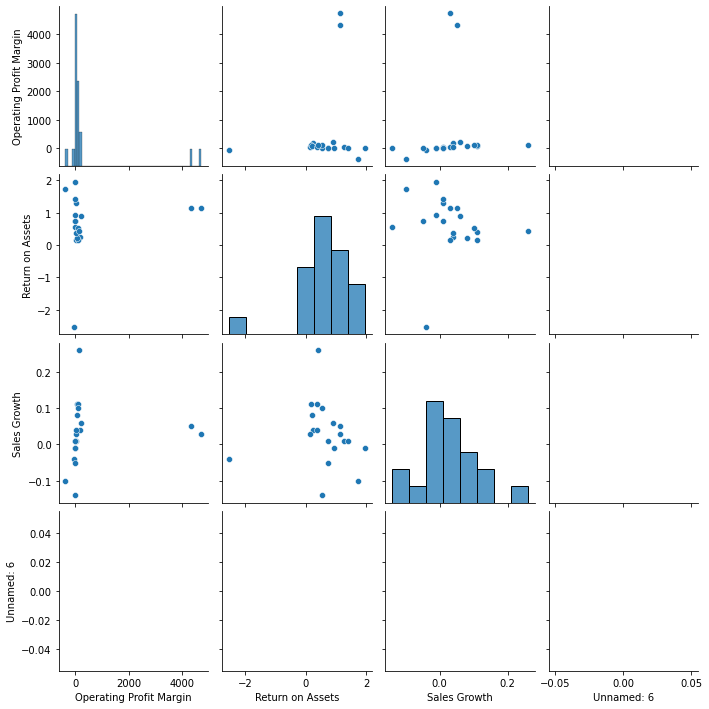

In [6]:
plt.figure(figsize=(15, 15))
sns.pairplot(df0, vars = df0.columns[1:13]);

# **2 Clustering**

# **2.1 Load Data**

In [7]:
df0 = pd.read_csv('../input/datafb-dataset/DataFB.csv')
df1 = df0[['DER','Operating Profit Margin','Sales Growth','Category']]
df1.describe()


,DER,Operating Profit Margin,Sales Growth,Category
count,20.000000,20.000000,20.000000,0.0
mean,5687.932281,476.109549,0.029500,NaN
std,14552.139453,1393.670384,0.084634,NaN
min,33.821513,-372.055132,-0.140000,NaN
25%,296.375782,-2.329721,-0.010000,NaN
50%,716.151833,25.708132,0.030000,NaN
75%,1980.754857,116.321926,0.065000,NaN
max,58775.946000,4729.034000,0.260000,NaN


<AxesSubplot:xlabel='Emitten', ylabel='Operating Profit Margin'>

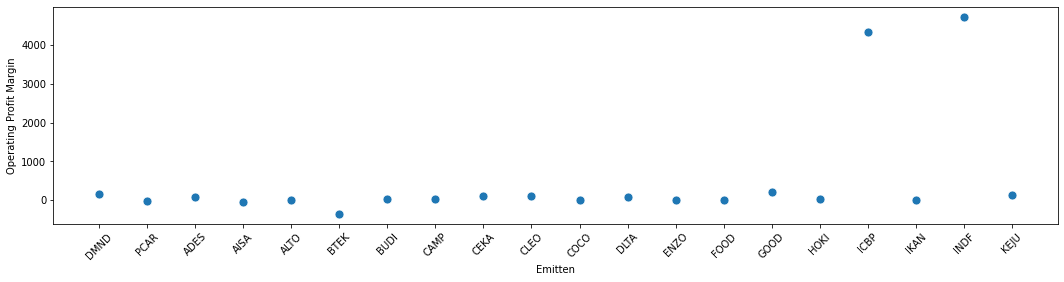

In [8]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Operating Profit Margin', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='DER'>

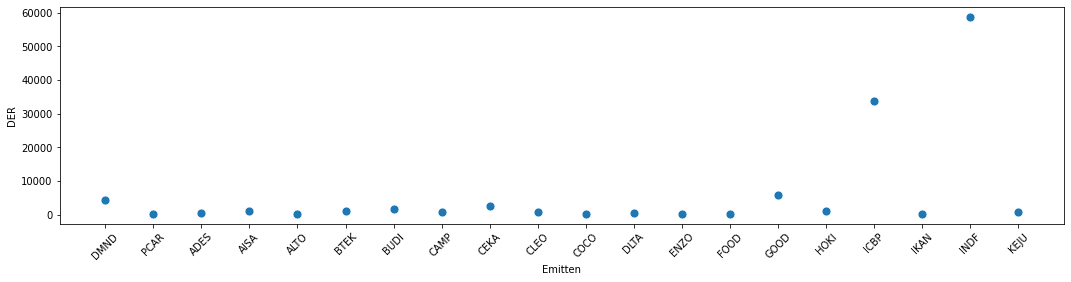

In [9]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='Emitten', ylabel='Sales Growth'>

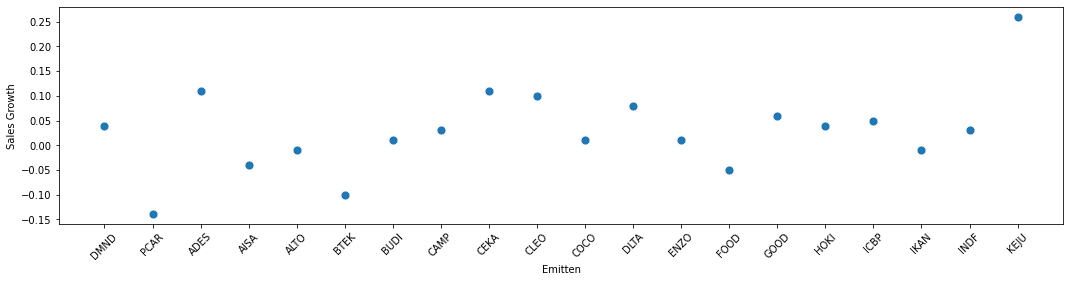

In [10]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='Emitten', y='Sales Growth', 
                data=df0, s=80)

# **2.2 Outlier**

In [11]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['Operating Profit Margin']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 20
Jumlah baris setelah memfilter outlier: 19


In [12]:
df1.describe()

,DER,Operating Profit Margin,Sales Growth,Category
count,19.000000,19.000000,19.000000,0.0
mean,2893.826296,252.271420,0.029474,NaN
std,7662.534224,996.234372,0.086953,NaN
min,33.821513,-372.055132,-0.140000,NaN
25%,276.989902,-3.404495,-0.010000,NaN
50%,712.510757,22.825563,0.030000,NaN
75%,1377.659500,104.824423,0.070000,NaN
max,33896.887000,4337.822000,0.260000,NaN


# **2.3 Standardisasi Fitur**

In [13]:
feats = ['DER','Operating Profit Margin','Sales Growth']
X = df1[feats].values
y = df1['Category'].values

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
new_df = pd.DataFrame(data = X_std, columns = feats)
new_df.describe()

,DER,Operating Profit Margin,Sales Growth
count,1.900000e+01,1.900000e+01,19.000000
mean,3.213803e-17,2.045148e-17,0.000000
std,1.027402e+00,1.027402e+00,1.027402
min,-3.834731e-01,-6.438591e-01,-2.002435
25%,-3.508688e-01,-2.636749e-01,-0.466406
50%,-2.924736e-01,-2.366242e-01,0.006219
75%,-2.032896e-01,-1.520600e-01,0.478843
max,4.156930e+00,4.213370e+00,2.723809


# **Melakukan K-Means**

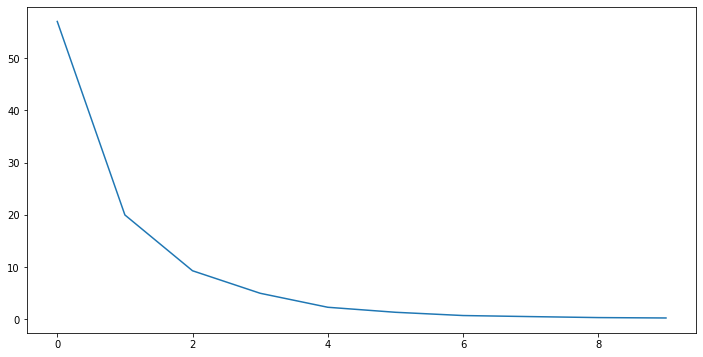

In [14]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_df.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

# **2.5 Pilih Jumlah Cluster**

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(new_df.values)

KMeans(n_clusters=5, random_state=0)

In [16]:
new_df['target'] = y
new_df['fit'] = kmeans.labels_

# **2.6 Plot Cluster**

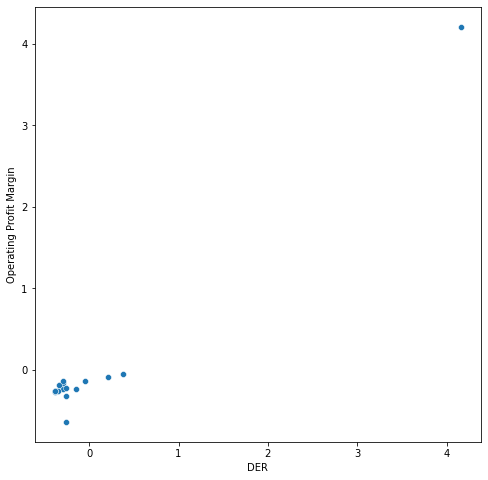

In [17]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='Operating Profit Margin', hue=new_df.target.to_list(), data=new_df);

In [18]:
new_df.head(5)

,DER,Operating Profit Margin,Sales Growth,target,fit
0,0.208527,-0.089974,0.124375,NaN,0
1,-0.383473,-0.272245,-2.002435,NaN,2
2,-0.322927,-0.183453,0.951468,NaN,0
3,-0.260493,-0.321663,-0.820874,NaN,4
4,-0.356067,-0.268703,-0.466406,NaN,4


In [19]:
new_df.insert(0,"Category",np.nan,True)
new_df.loc[new_df['fit'] == 0, 'Category'] = 2
new_df.loc[new_df['fit'] == 1, 'Category'] = 4
new_df.loc[new_df['fit'] == 2, 'Category'] = 1
new_df.loc[new_df['fit'] == 3, 'Category'] = 0
new_df.loc[new_df['fit'] == 4, 'Category'] = 3
new_df['Category'] = new_df['Category'].astype(int)
new_df.head(5)

,Category,DER,Operating Profit Margin,Sales Growth,target,fit
0,2,0.208527,-0.089974,0.124375,NaN,0
1,1,-0.383473,-0.272245,-2.002435,NaN,2
2,2,-0.322927,-0.183453,0.951468,NaN,0
3,3,-0.260493,-0.321663,-0.820874,NaN,4
4,3,-0.356067,-0.268703,-0.466406,NaN,4


In [20]:
new_df.drop(["fit","target"], axis=1, inplace=True)
new_df.columns = ['Category','DER (St.)','Operating Profit Margin (St.)', 'Sales Growth (St.)']
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       19 non-null     int64  
 1   DER (St.)                      19 non-null     float64
 2   Operating Profit Margin (St.)  19 non-null     float64
 3   Sales Growth (St.)             19 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 736.0 bytes


# **2.6.1 3D Scatter Plot**

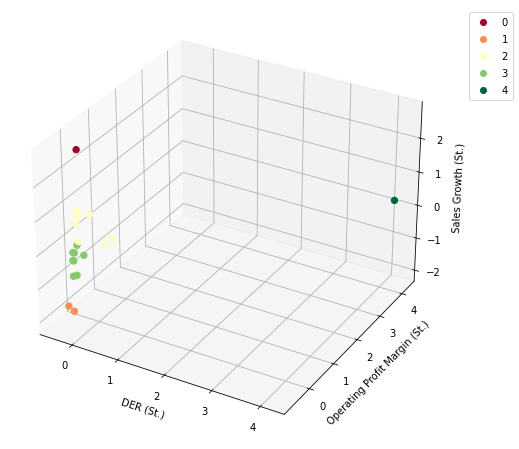

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_df['DER (St.)']
y = new_df['Operating Profit Margin (St.)']
z = new_df['Sales Growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")

cmap = ListedColormap(sns.color_palette("RdYlGn", 256).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_df['Category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# **2.6.2 X vs Z View**

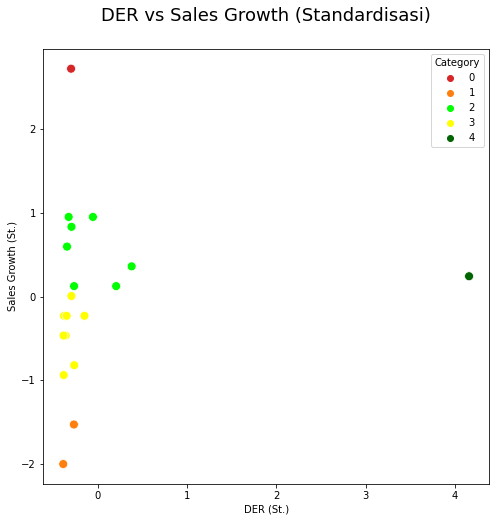

In [22]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"lime",
           3:"yellow",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **2.6.3 Y vs Z View**

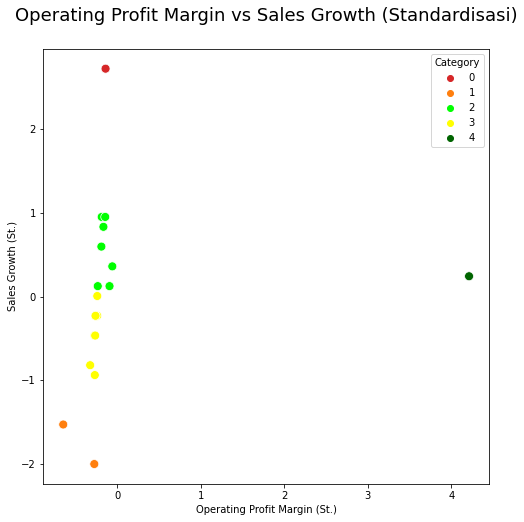

In [23]:
sns.scatterplot(x='Operating Profit Margin (St.)', y='Sales Growth (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("Operating Profit Margin vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **X vs Y View**

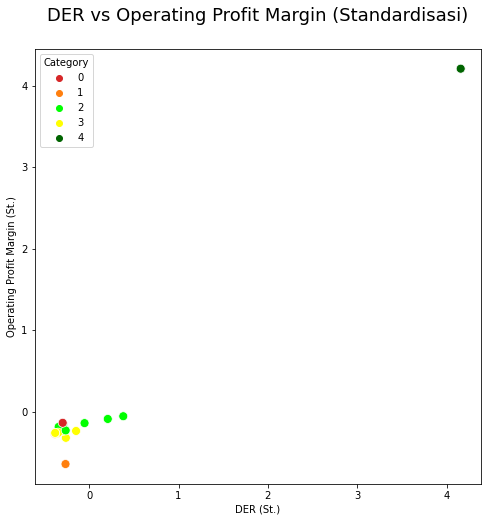

In [24]:
sns.scatterplot(x='DER (St.)', y='Operating Profit Margin (St.)', 
                hue='Category', data=new_df, s=80,
                palette=palette)
plt.title("DER vs Operating Profit Margin (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# **3 Export Result**

In [25]:
index_names = df0[ df0['Emitten'] == 'ARTO' ].index
df0.drop(index_names, inplace = True)
df0.reset_index(drop=True, inplace=True)
df0.drop(["Category",
         ], axis=1, inplace=True)

In [26]:
dftemp = pd.read_csv('../input/resultfb/resultFB.csv')
df = pd.concat([dftemp, new_df, df0], axis=1)
df.head(5)

,Industry,Company,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),Emitten,DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
0,Food and Beverages,Daimond Food Indonesia Tbk.,2.0,0.208527,-0.089974,0.124375,DMND,4449.058000,165.027000,0.24,0.04,NaN
1,Food and Beverages,Prima Cakrawala Abadi Tbk.,1.0,-0.383473,-0.272245,-2.002435,PCAR,33.821513,-11.714724,0.56,-0.14,NaN
2,Food and Beverages,Akasha Wira International Tbk.,2.0,-0.322927,-0.183453,0.951468,ADES,485.384000,74.384000,0.39,0.11,NaN
3,Food and Beverages,FKS Food Sejahtera Tbk.,3.0,-0.260493,-0.321663,-0.820874,AISA,951.024000,-59.633000,-2.54,-0.04,NaN
4,Food and Beverages,Tri Banyan Tirta Tbk.,3.0,-0.356067,-0.268703,-0.466406,ALTO,238.218141,-8.280273,1.96,-0.01,NaN


In [27]:
df.to_csv('resultFB.csv', index = False)

# **4 Get Centroid**

In [28]:
kmeans.cluster_centers_

array([[-0.09703814, -0.15031561,  0.56324034],
       [ 4.15692981,  4.21337019,  0.24253094],
       [-0.32387566, -0.45805212, -1.76612271],
       [-0.29578937, -0.13725035,  2.72380896],
       [-0.31676527, -0.26347579, -0.42209711]])

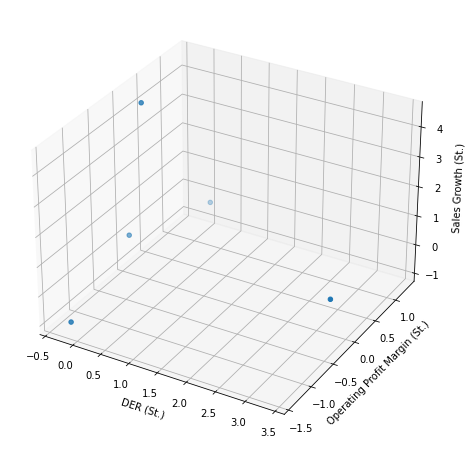

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [0.07796577,3.3825386,-0.19978728,-0.22183117,-0.32525515]
y = [1.27721216,-0.22442569,-1.39490532,0.15549501,-0.03911061]
z = [-0.22773712,0.35006475,-0.89274149,4.44060221,0.14030381]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("Operating Profit Margin (St.)")
ax.set_zlabel("Sales Growth (St.)")
ax.scatter(x, y, z)
plt.show()

# **5 Cluster Description**

In [30]:
#Highly Positively Impacted
df[df['Category'] == 4].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
count,1.0,1.00000,1.00000,1.000000,1.000,1.000,1.00,1.00,0.0
mean,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN
25%,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN
50%,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN
75%,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN
max,4.0,4.15693,4.21337,0.242531,33896.887,4337.822,1.14,0.05,NaN


In [31]:
#Highly Positively Impacted
df[df['Category'] == 3].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
count,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.0
mean,3.0,-0.316765,-0.263476,-0.422097,531.339265,-3.211394,0.582500,-0.006250,NaN
std,0.0,0.081460,0.026386,0.321652,607.542028,25.585687,1.373002,0.027223,NaN
min,3.0,-0.379883,-0.321663,-0.939030,60.593691,-59.633000,-2.540000,-0.050000,NaN
25%,3.0,-0.375736,-0.266595,-0.555023,91.526612,-6.235601,0.582500,-0.017500,NaN
50%,3.0,-0.350869,-0.259919,-0.348250,276.989902,0.237437,0.835000,0.000000,NaN
75%,3.0,-0.284479,-0.252493,-0.230093,772.139068,7.438297,1.320000,0.010000,NaN
max,3.0,-0.146086,-0.236624,0.006219,1804.295000,22.825563,1.960000,0.030000,NaN


In [32]:
#Highly Positively Impacted
df[df['Category'] == 2].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
count,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.0
mean,2.0,-0.097038,-0.150316,0.563240,2170.100012,106.515885,0.407143,0.077143,NaN
std,0.0,0.288808,0.060013,0.365548,2153.980307,58.191982,0.250713,0.030938,NaN
min,2.0,-0.341204,-0.230679,0.124375,349.070293,28.590701,0.170000,0.040000,NaN
25%,2.0,-0.307212,-0.185442,0.242531,602.588454,72.455073,0.235000,0.050000,NaN
50%,2.0,-0.262431,-0.162933,0.596999,936.570659,94.281205,0.380000,0.080000,NaN
75%,2.0,0.078541,-0.115580,0.892389,3479.596215,140.197320,0.465000,0.105000,NaN
max,2.0,0.381711,-0.056553,0.951468,5740.689797,197.434505,0.900000,0.110000,NaN


In [33]:
#Highly Positively Impacted
df[df['Category'] == 1].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.0
mean,1.0,-0.323876,-0.458052,-1.766123,478.308760,-191.884928,1.145000,-0.120000,NaN
std,0.0,0.084283,0.262771,0.334196,628.599893,254.799146,0.827315,0.028284,NaN
min,1.0,-0.383473,-0.643859,-2.002435,33.821513,-372.055132,0.560000,-0.140000,NaN
25%,1.0,-0.353674,-0.550956,-1.884279,256.065137,-281.970030,0.852500,-0.130000,NaN
50%,1.0,-0.323876,-0.458052,-1.766123,478.308760,-191.884928,1.145000,-0.120000,NaN
75%,1.0,-0.294077,-0.365149,-1.647967,700.552383,-101.799826,1.437500,-0.110000,NaN
max,1.0,-0.264278,-0.272245,-1.529811,922.796007,-11.714724,1.730000,-0.100000,NaN


In [34]:
#Highly Positively Impacted
df[df['Category'] == 0].describe()

,Category,DER (St.),Operating Profit Margin (St.),Sales Growth (St.),DER,Operating Profit Margin,Return on Assets,Sales Growth,Unnamed: 6
count,1.0,1.000000,1.00000,1.000000,1.000,1.000,1.00,1.00,0.0
mean,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
25%,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
50%,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
75%,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
max,0.0,-0.295789,-0.13725,2.723809,58775.946,4729.034,1.15,0.03,NaN
